Author: Amber Camilleri

# Model Performance Evaluation for Gender Predictions
**Models:**
1. test=wiki; train=wiki
2. test=utk_cropped; train=wiki
3. test=utk_uncropped; train=wiki

**Metric:** % Accuracy

In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import errorbar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

import numpy as np
import scipy.stats

## Load the Data
>`[gender]` is either 0 (male) or 1 (female)
>
>Note: The UTK dataset also includes labels for race as follows:
>
>`[race]` is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

#### (1) Test = WIKI;  Train = WIKI

In [2]:
gender1 = pd.read_csv('error_wiki_test_gender.csv')
gender1 = gender1.drop(gender1.columns[[0]], axis=1)

mae = mean_absolute_error(gender1['Actual'],gender1['Prediction'])
rmse = sqrt(mean_squared_error(gender1['Actual'], gender1['Prediction']))
print('Wiki//Wiki','MAE:',mae,'RMSE:',rmse)

Wiki//Wiki MAE: 0.01353994283135249 RMSE: 0.11636126001102123


#### (2) Test = UTK_cropped;  Train = WIKI

In [3]:
gender2 = pd.read_csv('utk_crop_gender_pred.csv')
gender2 = gender2.drop(gender2.columns[[0,1,4,5,7]], axis=1)
gender2.columns=['Actual','Race','Prediction']

mae = mean_absolute_error(gender2['Actual'],gender2['Prediction'])
rmse = sqrt(mean_squared_error(gender2['Actual'], gender2['Prediction']))
print('CroppedUTK//Wiki','MAE:',mae,'RMSE:',rmse)

CroppedUTK//Wiki MAE: 0.25935774186950294 RMSE: 0.5092717760385931


#### (3) Test = UTK_uncropped;  Train = WIKI

In [4]:
gender3 = pd.read_csv('utk_uncropped_gender_pred.csv')
gender3 = gender3.drop(gender3.columns[[0,1,4,5,7]], axis=1)
gender3.columns=['Actual','Race','Prediction']

mae = mean_absolute_error(gender3['Actual'],gender3['Prediction'])
rmse = sqrt(mean_squared_error(gender3['Actual'], gender3['Prediction']))
print('UncroppedUTK//Wiki','MAE:',mae,'RMSE:',rmse)

UncroppedUTK//Wiki MAE: 0.2166092419943251 RMSE: 0.4654129800449544


## Plot Model Performance

In [5]:
def correct_pred (row):
    if row['Actual'] == row['Prediction']: return 1
    else: return 0

    
def metrics (g):
    g['Correct'] = g.apply (lambda row: correct_pred (row),axis=1)
    accuracy = (g['Correct'].sum()*100) / len(g) #Take Ratio
    return pd.Series( dict( Accuracy = accuracy ) )


models=pd.DataFrame([metrics(gender1),metrics(gender2),metrics(gender3)],
                    index=['Wiki','UTK (Cropped)','UTK (Not Cropped)'])
models.sort_values(['Accuracy'], ascending=False, inplace=True) #Sort

In [6]:
models.reset_index()

,index,Accuracy
0,Wiki,98.646006
1,UTK (Not Cropped),78.339076
2,UTK (Cropped),74.064226


Text(0, 0.5, '% Accuracy')

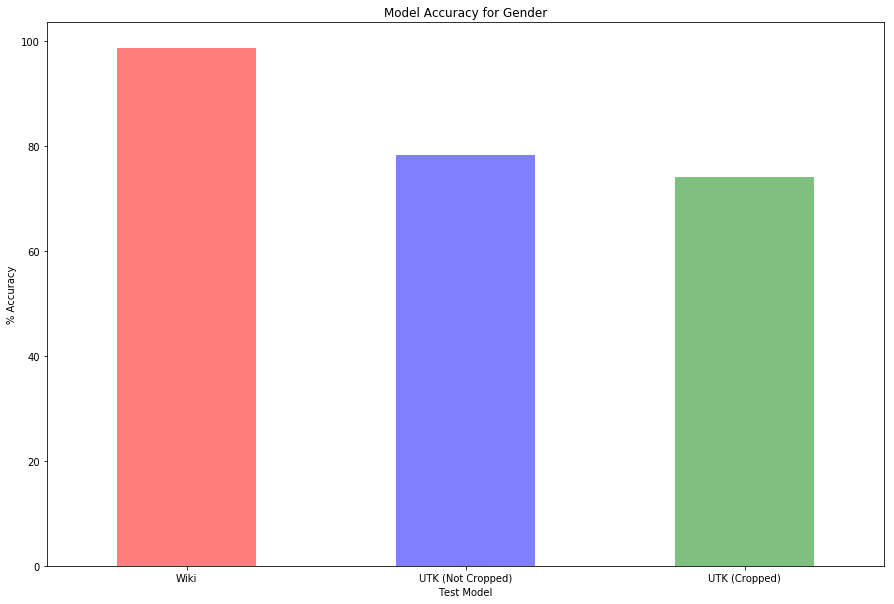

In [7]:
models.plot(kind='bar', alpha=0.5,figsize=(15,10),color=('r','b','g'),legend=False)

plt.title('Model Accuracy for Gender')
plt.xticks(rotation=0)
plt.xlabel('Test Model')
plt.ylabel('% Accuracy')

## Plot UTK Model Performance by Race
**Models:**
2. test=utk_cropped; train=wiki
3. test=utk_uncropped; train=wiki

In [8]:
race2=gender2.groupby( 'Race' ).apply( metrics ).reset_index()
race2.sort_values(['Accuracy'], ascending=False, inplace=True) #Sort
race3=gender3.groupby( 'Race' ).apply( metrics ).reset_index()
race3.sort_values(['Accuracy'], ascending=False, inplace=True) #Sort

#### Label Race

In [9]:
def label_race (i):
    if i==0: return 'White'
    elif i==1: return 'Black'
    elif i==2: return 'Asian'
    elif i==3: return 'Indian'
    elif i==4: return 'Others'
    else: return

In [10]:
race2['Race'] =race2['Race'].apply(label_race)
race3['Race'] =race3['Race'].apply(label_race)

In [11]:
race2.head()

,Race,Accuracy
0,White,81.234568
4,Others,72.892112
1,Black,65.679012
2,Asian,63.554411
3,Indian,62.534435


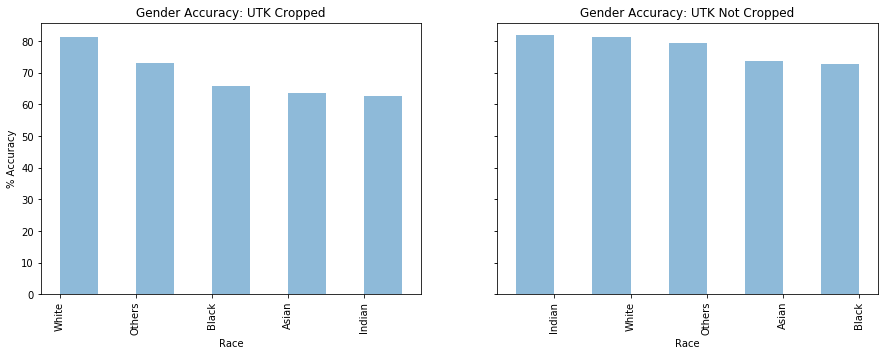

In [34]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharey=True)
race2.plot(x='Race',kind='bar', alpha=0.5, ax=ax1, legend=False)
ax1.set(ylabel='% Accuracy',xlabel='Race', title='Gender Accuracy: UTK Cropped')

race3.plot(x='Race',kind='bar',alpha=0.5, ax=ax2, legend=False)
ax2.set(ylabel='% Accuracy',xlabel='Race', title='Gender Accuracy: UTK Not Cropped')

plt.show()

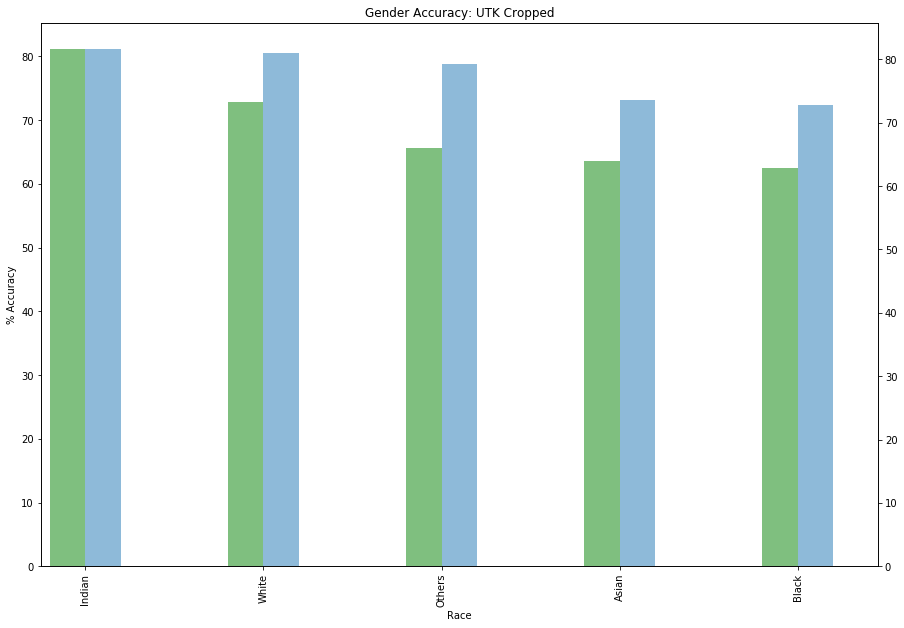

In [60]:
ax1=race2.plot(x='Race',kind='bar', color='g',alpha=0.5, width=0.2, legend=False,position=1, figsize=(15,10))
ax1.set(ylabel='% Accuracy',xlabel='Race', title='Gender Accuracy: UTK Cropped')
ax2 = ax1.twinx()
race3.plot(x='Race',kind='bar',alpha=0.5, sharey=True, ax=ax2, width=0.2,legend=False, position=0)

Text(0.5, 0, 'Race')

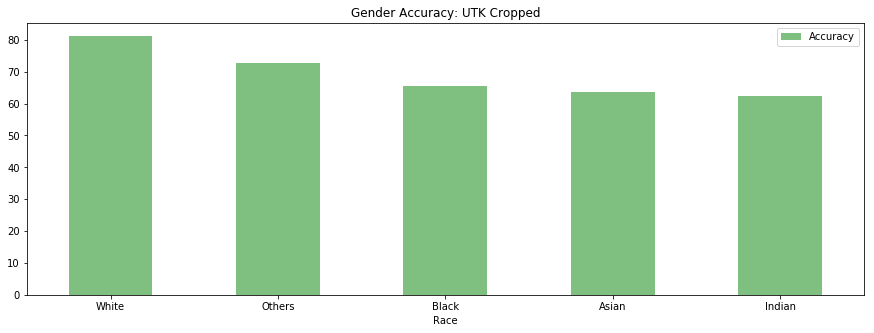

In [65]:
race2.plot(x='Race',kind='bar', alpha=0.5, figsize=(15,5), color='g')
plt.title('Gender Accuracy: UTK Cropped')
plt.xticks(rotation=0)
plt.xlabel('Race')

Text(0.5, 0, 'Race')

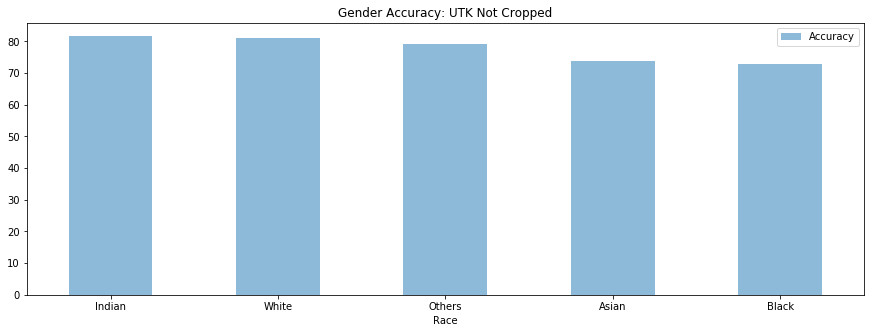

In [62]:
race3.plot(x='Race',kind='bar',alpha=0.5, figsize=(15,5))
plt.title('Gender Accuracy: UTK Not Cropped')
plt.xticks(rotation=0)
plt.xlabel('Race')